# Exercises
Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans
from pydataset import data
import acquire_mall



## 1. Clustering with the Iris Dataset

- Using this lesson as a guide, perform clustering on the iris dataset.

- a. Choose features other than the ones used in the lesson.
- b. Visualize the results of your clustering.
- c. Use the elbow method to visually select a good value for k.
- d. Repeat the clustering, this time with 3 different features.


In [2]:
iris= data('iris')

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


array([[<AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

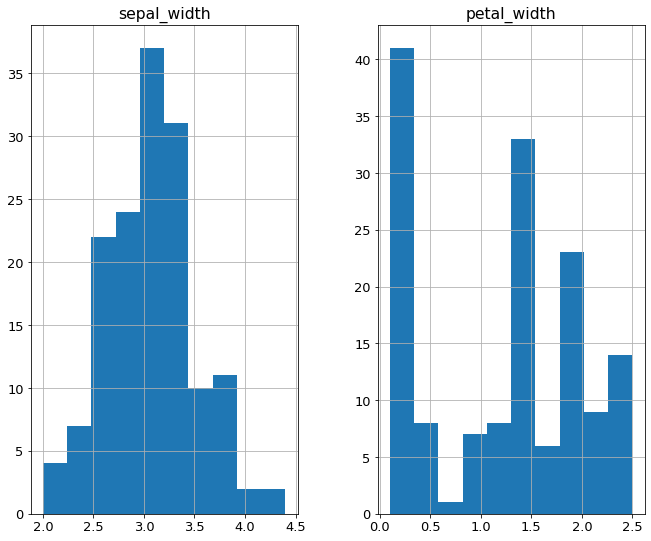

In [6]:
X.hist()

In [7]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [8]:
X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


In [9]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [10]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [11]:
# lets look at sample of 10 randomly selected rows in iris dataset

iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
34,5.5,4.2,1.4,0.2,setosa,0
124,6.3,2.7,4.9,1.8,virginica,1
129,6.4,2.8,5.6,2.1,virginica,2
112,6.4,2.7,5.3,1.9,virginica,1
150,5.9,3.0,5.1,1.8,virginica,2
28,5.2,3.5,1.5,0.2,setosa,0
14,4.3,3.0,1.1,0.1,setosa,0
127,6.2,2.8,4.8,1.8,virginica,1
47,5.1,3.8,1.6,0.2,setosa,0
46,4.8,3.0,1.4,0.3,setosa,0


In [12]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 0.90625492, -1.25634413],
       [-1.00672719,  0.22991755],
       [ 0.11627194,  0.98166637]])

In [13]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns= X.columns)

centroids_scaled

,sepal_width,petal_width
0,0.906255,-1.256344
1,-1.006727,0.229918
2,0.116272,0.981666


In [14]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

,sepal_width,petal_width
cluster,,
0,3.451020,0.244898
1,2.620000,1.374000
2,3.107843,1.945098


In [15]:
# Another way to get unscaled centroids?
#Use inverse transform function
scaler.inverse_transform(kmeans.cluster_centers_)

array([[3.45102041, 0.24489796],
       [2.62      , 1.374     ],
       [3.10784314, 1.94509804]])

In [16]:
# Labels (same as from predict)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

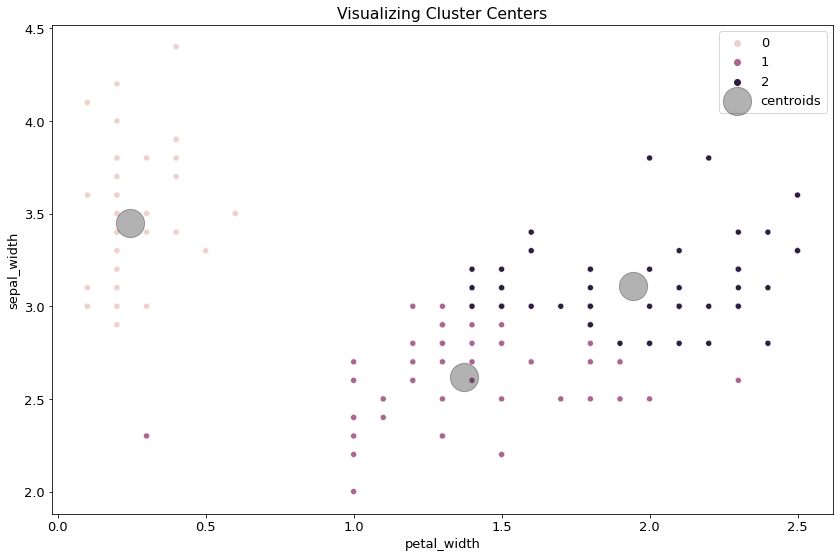

In [17]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x= 'petal_width', y ='sepal_width', data= iris, hue= 'cluster')

# plot cluster centers (centroids)
centroids.plot.scatter(x= 'petal_width', y = 'sepal_width', 
                            ax= plt.gca(),
                             s= 800,
                             color= 'k',
                             alpha= 0.3,
                             label= 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [18]:
#Looking at what columns are in centroids
centroids.head()

,sepal_width,petal_width
cluster,,
0,3.451020,0.244898
1,2.620000,1.374000
2,3.107843,1.945098


In [19]:
#Looking at columns in iris df
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [20]:
iris['cluster']= 'cluster_' + iris.cluster.astype(str)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


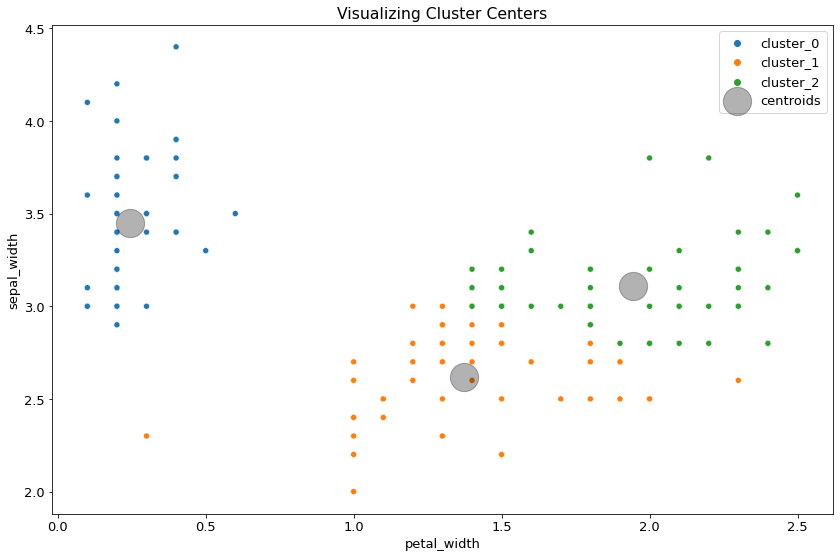

In [22]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x= 'petal_width', y ='sepal_width', data= iris, hue= 'cluster')

# plot cluster centers (centroids)
centroids.plot.scatter(x= 'petal_width', y = 'sepal_width', 
                            ax= plt.gca(),
                             s= 800,
                             color= 'k',
                             alpha= 0.3,
                             label= 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

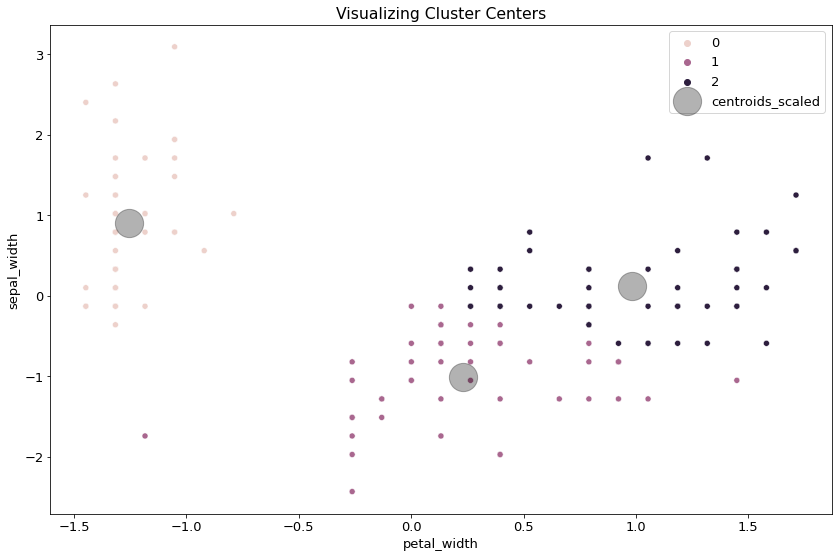

In [24]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x= 'petal_width', y ='sepal_width', data= X_scaled, hue= 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x= 'petal_width', y = 'sepal_width', 
                            ax= plt.gca(),
                             s= 800,
                             color= 'k',
                             alpha= 0.3,
                             label= 'centroids_scaled')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [25]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

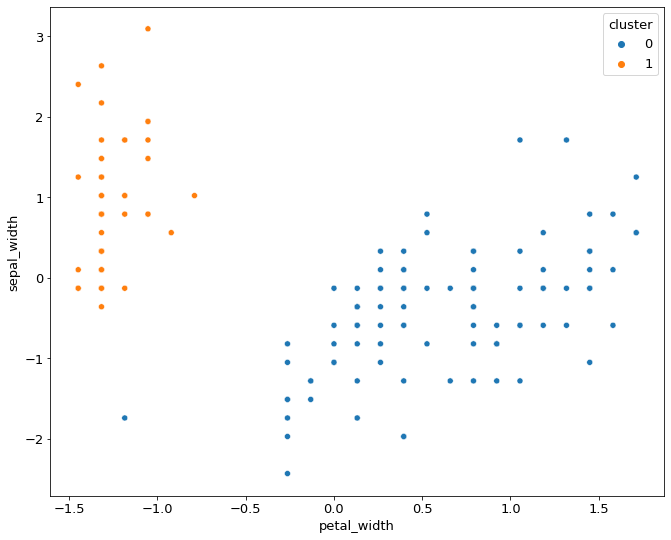

In [26]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster')

In [27]:
kmeans.inertia_

125.36847212365322

In [28]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

125.36847212365322

In [29]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

79.23480116760695

In [30]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

59.181852912002405

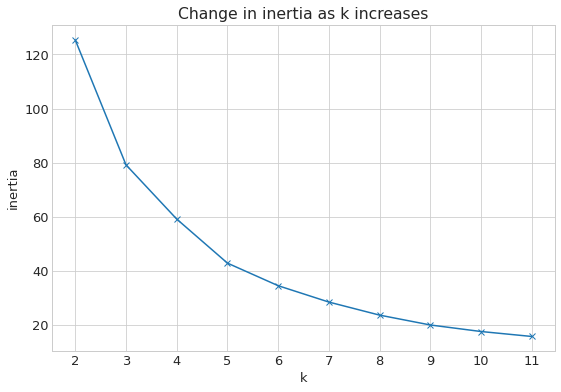

In [31]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

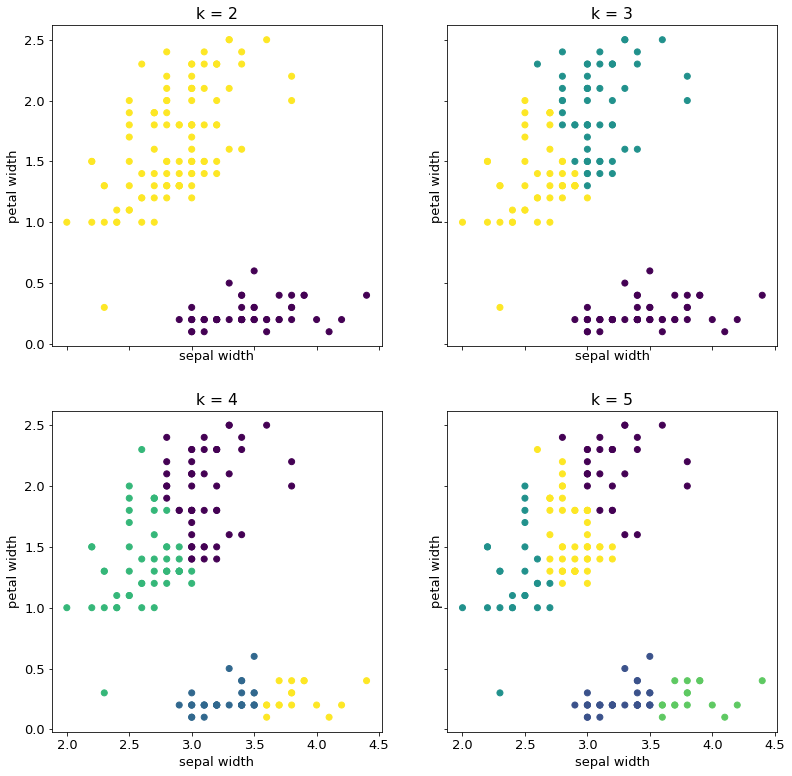

In [32]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

In [ ]:
#Choose features
X = iris[['petal_width', 'sepal_width', 'sepal_length']]

In [70]:
# Scale the X features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [71]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [74]:
# make a new column names cluster in iris and X_scaled dataframe
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [72]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids_scaled

,petal_width,sepal_width
0,-1.256344,0.906255
1,0.229918,-1.006727
2,0.981666,0.116272


Text(0.5, 1.0, 'Visualizing Cluster Centers')

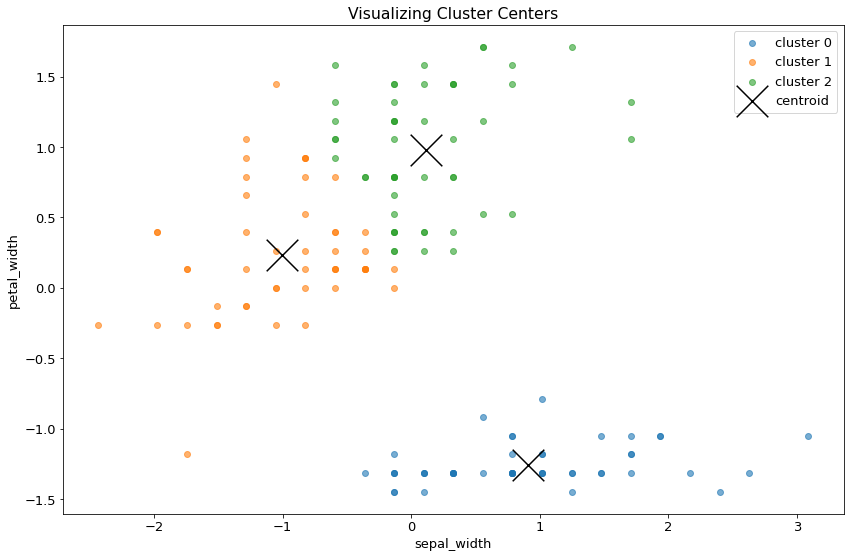

In [75]:
plt.figure(figsize=(14, 9))

for cluster, subset in X_scaled.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids_scaled.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!


In [33]:
mall_df= acquire_mall.get_mallcustomer_data()

In [34]:
mall_df.sample(10)

,gender,age,annual_income,spending_score
customer_id,,,,
126,Female,31,70,77
148,Female,32,77,74
14,Female,24,20,77
196,Female,35,120,79
29,Female,40,29,31
170,Male,32,87,63
50,Female,31,40,42
95,Female,32,60,42
39,Female,36,37,26


In [35]:
# define independent variables for k-means

X2 = mall_df[['age', 'spending_score']]
X2.head()

,age,spending_score
customer_id,,
1,19,39
2,21,81
3,20,6
4,23,77
5,31,40


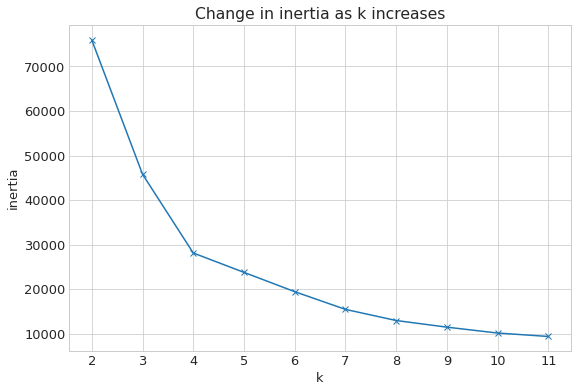

In [36]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [37]:
# make a new column names cluster in mall_df

mall_df['cluster'] = kmeans.predict(X2)

In [38]:
# lets look at sample of 10 randomly selected rows in mall_df dataset

mall_df.sample(10)

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
188,Male,28,101,68,3
27,Female,45,28,32,1
181,Female,37,97,32,1
148,Female,32,77,74,3
179,Male,59,93,14,1
183,Male,46,98,15,1
116,Female,19,65,50,3
182,Female,32,97,86,3
150,Male,34,78,90,3


In [39]:
# Centriods for unscaled data?
centroids2 = mall_df.groupby('cluster')['age', 'spending_score'].mean()
centroids2

,age,spending_score
cluster,,
1,48.314286,32.228571
3,28.389474,70.063158


<AxesSubplot:xlabel='age', ylabel='spending_score'>

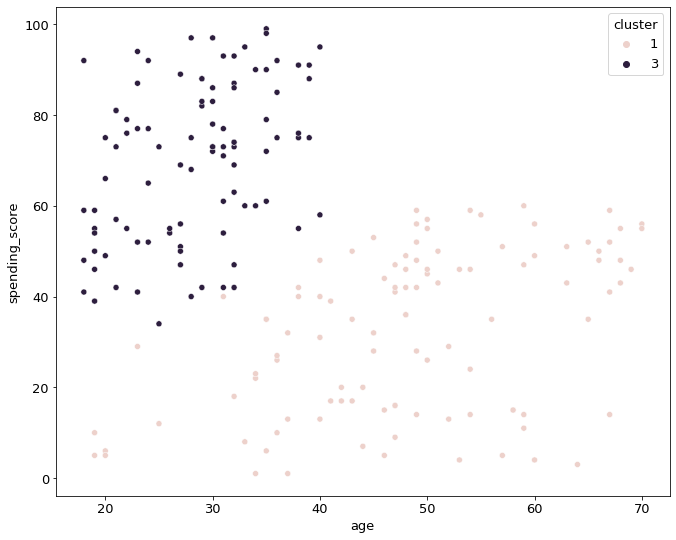

In [40]:
# lets look at four clusters (i.e k = 4)

kmeans2 = KMeans(n_clusters = 4)
kmeans2.fit(X2)
sns.scatterplot(x='age', y='spending_score', data = mall_df, hue = 'cluster')

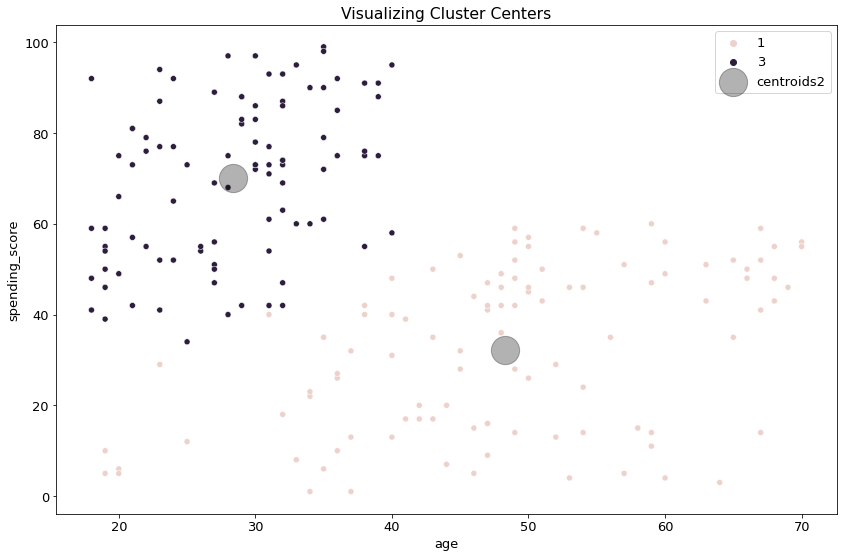

In [41]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x= 'age', y ='spending_score', data= mall_df, hue= 'cluster')

# plot cluster centers (centroids)
centroids2.plot.scatter(x= 'age', y = 'spending_score', 
                            ax= plt.gca(),
                             s= 800,
                             color= 'k',
                             alpha= 0.3,
                             label= 'centroids2')

plt.title('Visualizing Cluster Centers')
plt.legend();

## 3. How does scaling impact the results of clustering?

- Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [59]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler().fit(X2)
X_mall_scaled = pd.DataFrame(scaler.transform(X2), columns= X2.columns).set_index([X2.index.values])

In [60]:
X_mall_scaled.head()

,age,spending_score
1,23.431406,82.738856
2,26.064050,179.421498
3,24.747728,6.773924
4,28.696694,170.213628
5,39.227268,85.040824


In [61]:
# sklearn implementation of KMeans

#define the thing
kmeans2 = KMeans(n_clusters=4, random_state = 254)

# fit the thing
kmeans2.fit(X_mall_scaled)

# Use (predict using) the thing 
kmeans2.predict(X_mall_scaled)

array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3,
       0, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [62]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans2.cluster_centers_

array([[ 54.96711689,  26.5610498 ],
       [ 38.14188028, 182.53117382],
       [ 68.23253574, 100.30650433],
       [ 32.4431482 , 111.12979088]])

In [63]:
# define independent variables for k-means

# X_mall = mall_df[['age', 'spending_score']]
# X_mall.head()

In [64]:
# Make a dataframe 
centroids_mall_scaled = pd.DataFrame(kmeans2.cluster_centers_, columns= X2.columns)

centroids_mall_scaled

,age,spending_score
0,54.967117,26.561050
1,38.141880,182.531174
2,68.232536,100.306504
3,32.443148,111.129791


In [65]:
# make a new column names cluster in iris and X_scaled dataframe

X_mall_scaled['cluster'] = kmeans2.predict(X_mall_scaled)

In [66]:
X_mall_scaled.head()

,age,spending_score,cluster
1,23.431406,82.738856,3
2,26.064050,179.421498,1
3,24.747728,6.773924,0
4,28.696694,170.213628,1
5,39.227268,85.040824,3


In [67]:
centroids_mall_scaled.head()

,age,spending_score
0,54.967117,26.561050
1,38.141880,182.531174
2,68.232536,100.306504
3,32.443148,111.129791


Text(0.5, 1.0, 'Visualizing Cluster Centers(scaled)')

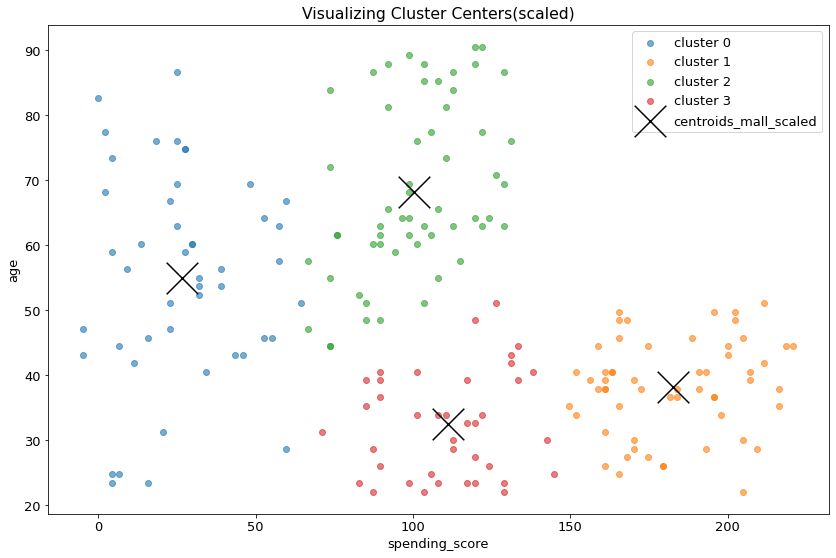

In [68]:
plt.figure(figsize=(14, 9))

for cluster, subset in X_mall_scaled.groupby('cluster'):
    plt.scatter(subset.spending_score, subset.age, label='cluster ' + str(cluster), alpha=.6)

centroids_mall_scaled.plot.scatter(y= 'age', x='spending_score', c='black', marker='x', s=1000, ax=plt.gca(), label='centroids_mall_scaled')

plt.legend()
plt.xlabel('spending_score')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers(scaled)')

# Takeways:
- scaling in this case did not have effect on data
- clusters didn't change very much